# Introduction
Author: Reuben Jooste

Student No: u21457060

**Note: This assignment uses file paths that were set up during the implementation of this assignment. If you would like to test this program, please ensure to update the file paths were necessary to prevent any 'Directory not found' errors from being raised.**

### Assignment 2 - Almond Type Classification
During this notebook we will implement and compare a few gradient-based algorithms for training a simple neural network (NN).

**Chosen Algorithms:**
- Stochastic Gradient-based Descent (SGD)
- Resilient Back propagation (RProp)
- Adaptive Moment Estimation (Adam)

**Dataset:**

We will make use of the dataset found [here](https://www.kaggle.com/datasets/sohaibmoradi/almond-types-classification). The dataset consists of the following information:
- 14 Features (see above link for more information on the different features)
- 2803 Records/Rows

# Library Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

# Data Pre-processing
### Load the dataset

In [3]:
raw_data = pd.read_csv('/kaggle/input/almond-types-classification/Almond.csv')
raw_data.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [4]:
raw_data.shape

(2803, 14)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [6]:
# Analyze descriptive statistics
raw_data.describe()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,1401.000000,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,809.300727,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,0.000000,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,700.500000,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,1401.000000,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,2101.500000,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,2802.000000,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


In [7]:
# check for duplicates
raw_data.duplicated().sum()

0

In [8]:
# We can drop the column named 'Unnamed: 0' since it has no value to us because it represents the row numbers
raw_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_data.head(1)

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA


In [9]:
# Visualize distribution of unclean data
def plot_distributions(data):
    # Set the plot style
    sns.set(style='whitegrid')

    # Separate numeric and categorical columns
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns

    # Calculate the total number of plots
    total_plots = len(numeric_columns) + len(categorical_columns)

    # Set the size of the plot
    plt.figure(figsize=(16, 12))

    # Plot histograms for numeric columns
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.histplot(data[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')

    # Plot bar plots for categorical columns
    for j, column in enumerate(categorical_columns, len(numeric_columns) + 1):
        plt.subplot(4, 4, j)
        sns.countplot(y=data[column], palette='Set2', order=data[column].value_counts().index)
        plt.title(f'Frequency of {column}')

    # Adjust the layout to avoid overlap
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

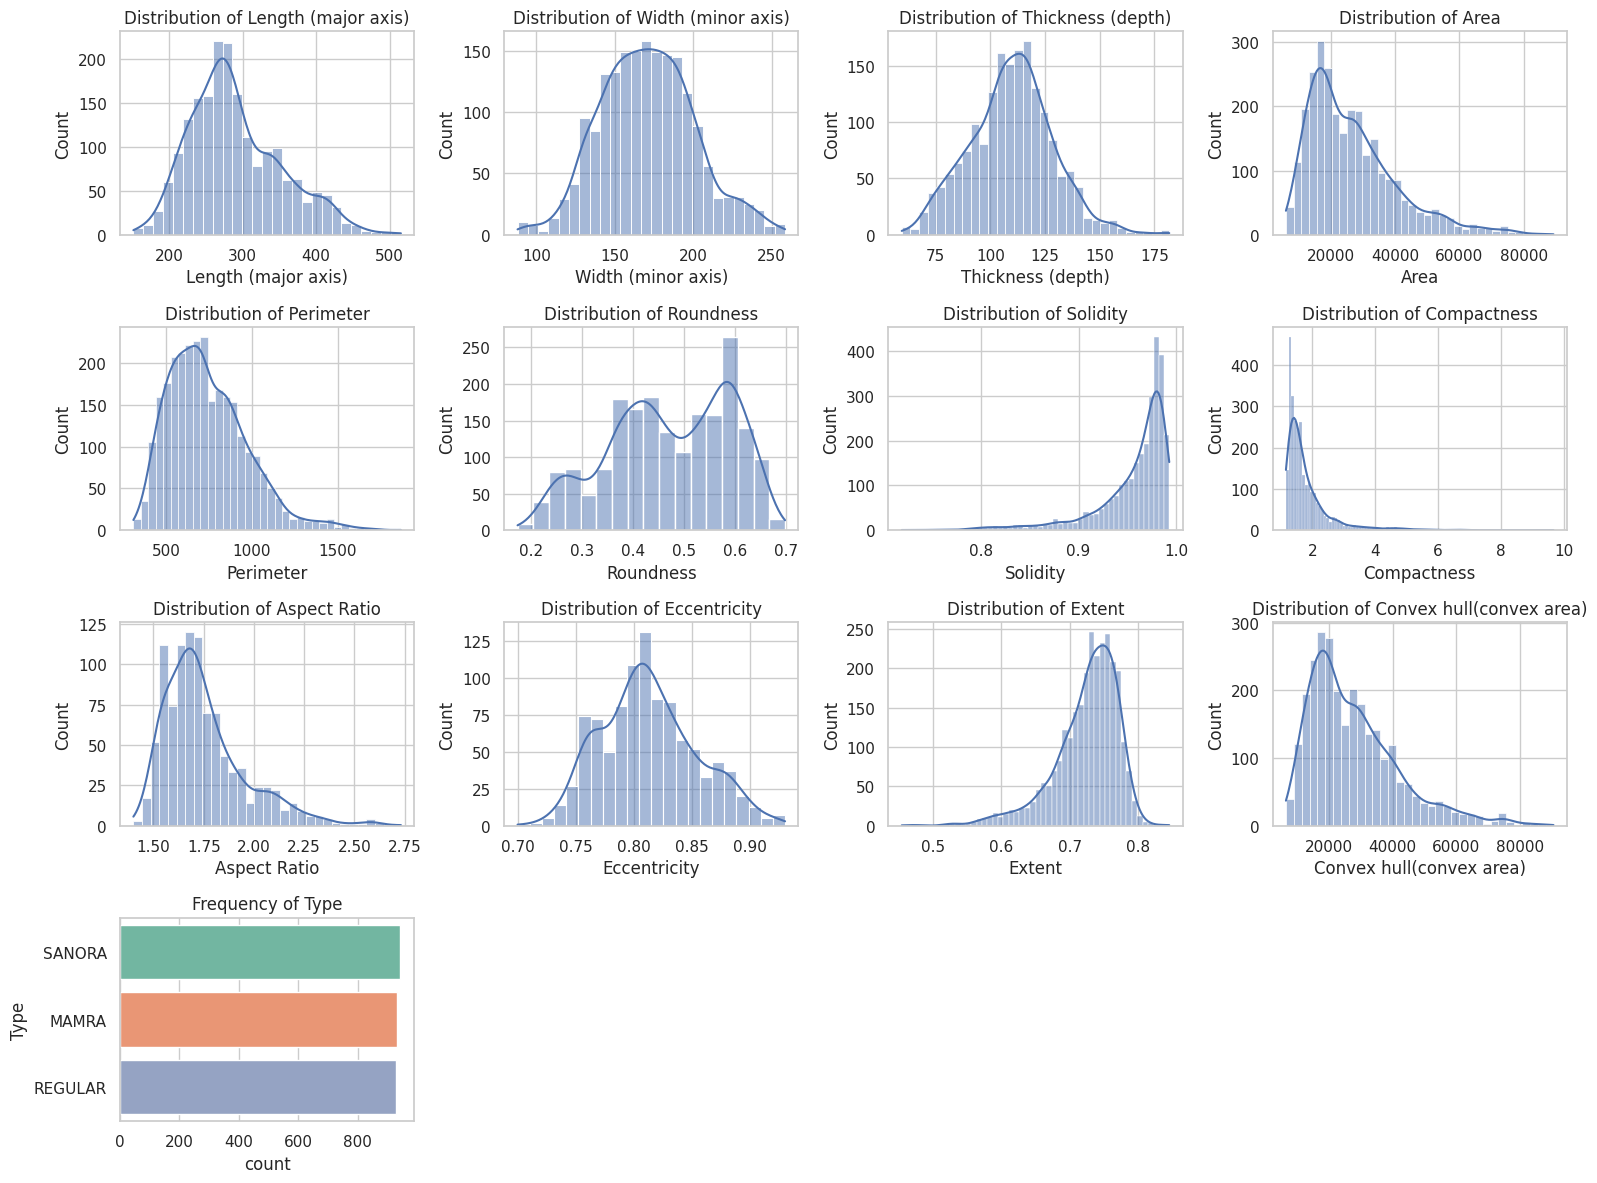

In [10]:
# plot histograms
plot_distributions(raw_data)

This grid above shows a clear visualization of the different features' distribution. We note that some feature have a normal distribution while other are either skewed to the right or skewed to the left. Using this information, we are able to decide whether or not to replace missing values with the mean of the respective feature (if the data has a Gaussian distribution) or to replace them using the median of the respective feature (if the data is skewed).

In [11]:
# Analyze te number of occurrences for the Type attribute
raw_data['Type'].value_counts()

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

The CLASS variable for our classification problem seems to be relatively balanced which is good. However, when using Cross-Validation we will again need to analyze it to determine whether or not our training data is unbalanced or not.

### Analyzing outliers

In [12]:
raw_data.select_dtypes(include=[np.number]).columns

Index(['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)',
       'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness',
       'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)'],
      dtype='object')

In [13]:
def plot_boxplots(data):
    # Identify numeric and categorical columns
    num_cols = data.select_dtypes(include=[np.number]).columns

    # Calculate the number of rows and columns for the grid
    num_cols_total = len(num_cols)
    num_rows = (num_cols_total + 2) // 3  # Adding 2 to round up to the next integer if not perfectly divisible

    # Create a figure with subplots
    fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axs = axs.flatten()  # Flatten the array of axes to easily index

    for i, col in enumerate(num_cols):
        sns.boxplot(data[col], ax=axs[i])
        axs[i].set_title(f'Boxplot of {col}')
        axs[i].set_xlabel(col)

    # Hide any extra subplots
    for j in range(num_cols_total, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

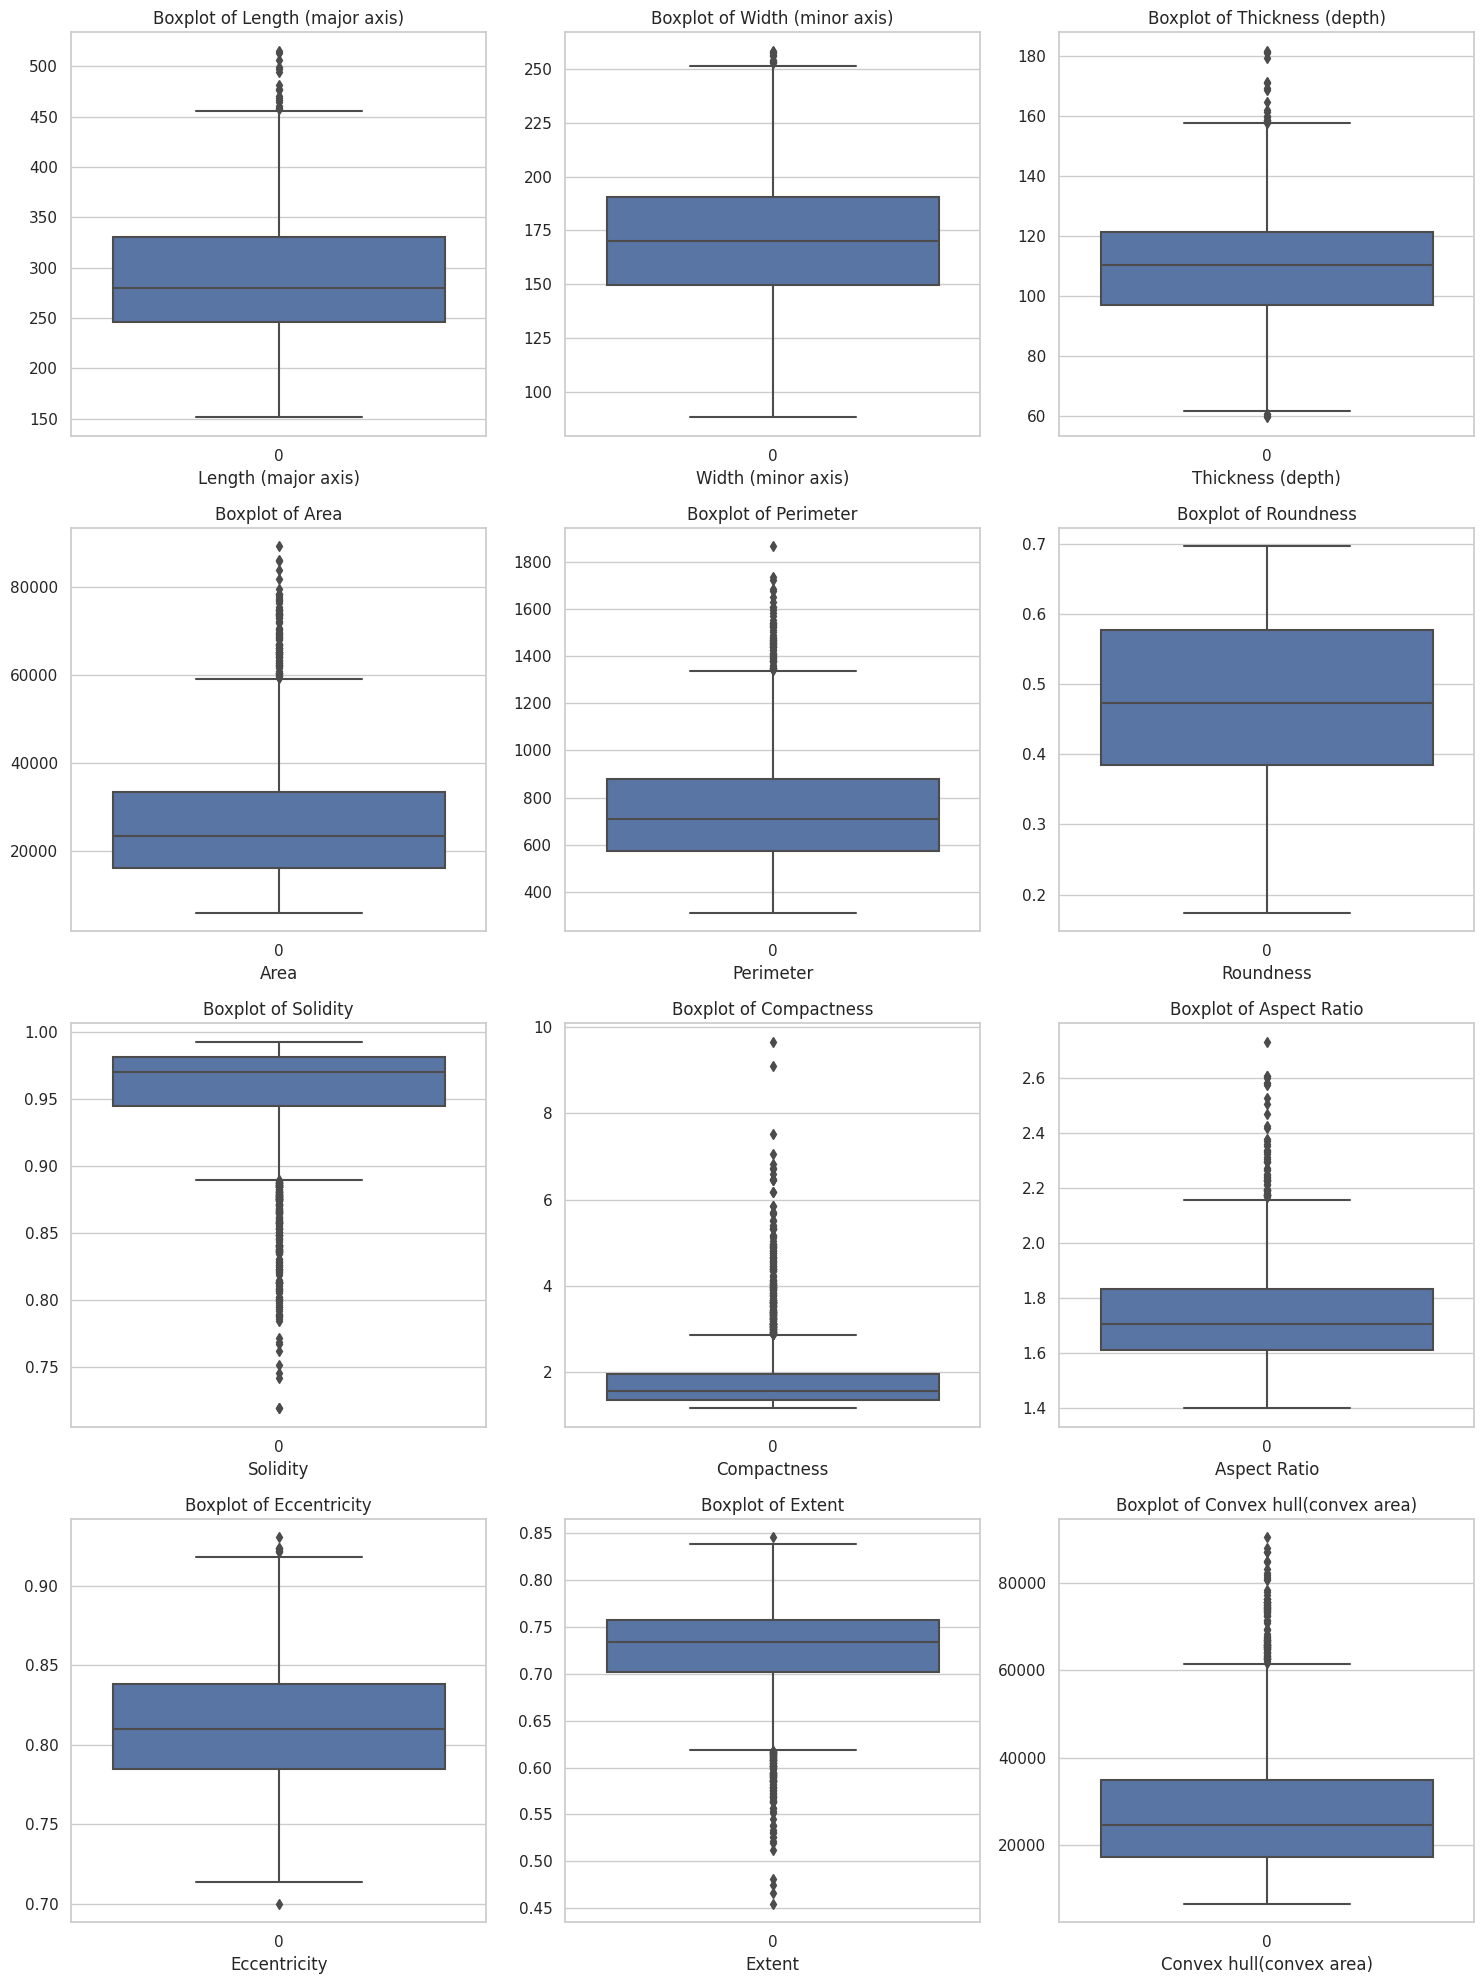

In [14]:
plot_boxplots(raw_data)

From the Boxplots above we note that there seems to be some outliers within some of the features. We can make use of the Z-Score or interquartile range (IQR) to remove these outliers or replace them with the median (for skewed data) or the mean (for normal dist. data).

### Handling missing values and outliers

In [15]:
# function to clean the data
def clean_outliers(data):
    skewed_attr = ['Width (minor axis)', 'Thickness (depth)', 'Roundness', 'Eccentricity']
    normal_attr = [a for a in data.select_dtypes(include=[np.number]).columns if a not in skewed_attr]

    # use zscore to handle normal attribute outliers
    for col in normal_attr:
        # find z-scores
        z_scores = stats.zscore(data[col])
        abs_z_scores = np.abs(z_scores)

        # find outliers
        outliers = abs_z_scores > 3

        # replace outliers with the mean
        mean_val = data[col].mean()
        data.loc[outliers, col] = mean_val

    # use IQR to handle skewed attribute outliers
    for col in data.select_dtypes(include=[np.number]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (data[col] < lower_bound) | (data[col] > upper_bound)

        # Replace outliers with the median
        median = data[col].median()
        data.loc[outliers, col] = median

    return data

no_outlier_data = clean_outliers(raw_data.copy())

In [16]:
no_outlier_data.isna().sum() # view number of missing values for each feature

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

Our dataset contains a lot of missing values and some features are dependent on other features (e.g. Aspect Ratio is dependent on Width and Length). Due to the high number of missing values, replacing them with the mean or median is simple but may introduce a bias for the models. Thus we will use a more effective imputation strategy known as KNN imputation. This method take the K-nearest records and uses their values to replace the null value of a specific record. This will ensure that our distribution for each feature are free from any bias.

In [17]:
def clean_missing_values(data):
    # replace the 'Length', 'Width', and 'Thickness' using the KNNImputer
    imputer = KNNImputer(n_neighbors=5)

    data_array = data[['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)']].values
    imputed_data = imputer.fit_transform(data_array)

    data[['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)']] = imputed_data

    # handle missing values for dependent features
    data['Roundness'] = data['Roundness'].fillna(4 * data['Area'] / ( np.pi * data['Length (major axis)'] ** 2))

    data['Aspect Ratio'] = data['Aspect Ratio'].fillna(data['Length (major axis)'] / data['Width (minor axis)'])
    data['Eccentricity'] = data['Eccentricity'].fillna(np.sqrt(1 - ( data['Width (minor axis)'] / data['Length (major axis)']) **2 ))

    return data

In [18]:
clean_data = clean_missing_values(no_outlier_data.copy())
clean_data.isna().sum()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Length (major axis)         0
Width (minor axis)          0
Thickness (depth)           0
Area                        0
Perimeter                   0
Roundness                   0
Solidity                    0
Compactness                 0
Aspect Ratio                0
Eccentricity                1
Extent                      0
Convex hull(convex area)    0
Type                        0
dtype: int64

In [19]:
# remove the one record with a missing value
clean_data.dropna(inplace=True)
clean_data.isna().sum().sum()

0

Our data should now be cleaned (free of outliers and missing values). We now visualise the distributions again to see the changes.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

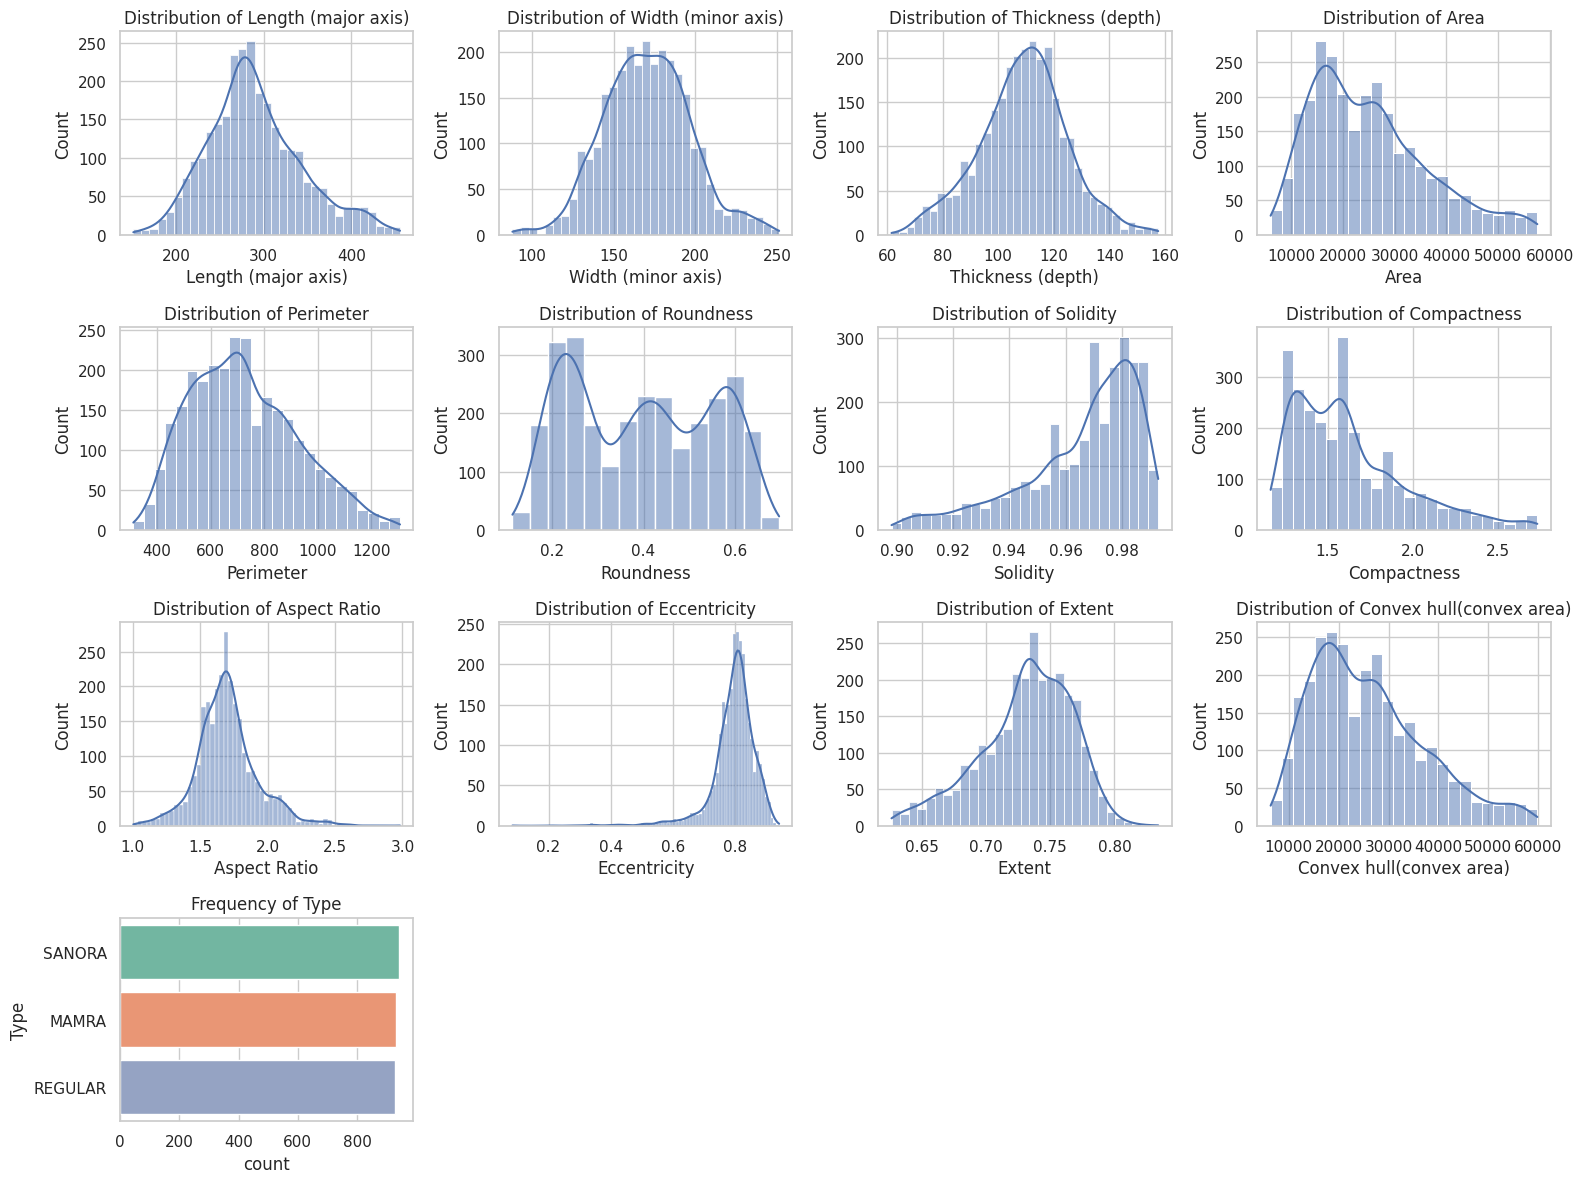

In [20]:
plot_distributions(clean_data) # we again visualise the distributions after imputation

### Standardisation/Normalisation

We note that some of our data still have skewed distributions. However, since this is a neural network classification task we can leave them skewed at NNs are often good at non-normal data.

In [21]:
# normalize the data points using min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(clean_data.drop(['Type'], axis=1))
scaled_data = pd.DataFrame(scaled_data, columns=clean_data.drop(['Type'], axis=1).columns)
scaled_data['Type'] = clean_data['Type']
scaled_data.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.461868,0.856796,0.689155,0.321681,0.333464,0.385809,0.794191,0.187751,0.139944,0.629940,0.263930,0.315605,MAMRA
1,0.574596,0.895061,0.693742,0.329809,0.370772,0.279186,0.624532,0.279506,0.196705,0.713241,0.144357,0.331084,MAMRA
2,0.713794,0.865849,0.668715,0.317170,0.336606,0.166587,0.729687,0.206607,0.304650,0.814103,0.275615,0.313857,MAMRA
3,0.724218,0.886333,0.669988,0.320895,0.350942,0.163514,0.711137,0.240610,0.299871,0.810669,0.283991,0.318362,MAMRA
4,0.443880,0.870333,0.475590,0.252794,0.314425,0.313849,0.562760,0.297112,0.121708,0.595658,0.425711,0.255849,MAMRA


### Encoding Target classes
We will encode the target class to values of 0, 1, or 2. This is important since our model will use a CrossEntropyLoss function.

In [22]:
# make sure there are not any missing values for the Type class
scaled_data['Type'].isna().sum()

1

There seems to be 1 record with a missing value. We can remove it since it is only one record from 2803 records.

In [23]:
scaled_data.dropna(inplace=True)
scaled_data['Type'].isna().sum()

0

In [24]:
# convert target class
encoded_data = scaled_data.copy()
encoded_data['Type'] = encoded_data['Type'].astype('category')
encoded_data['Type'] = encoded_data['Type'].cat.codes
encoded_data.head()

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0.461868,0.856796,0.689155,0.321681,0.333464,0.385809,0.794191,0.187751,0.139944,0.629940,0.263930,0.315605,0
1,0.574596,0.895061,0.693742,0.329809,0.370772,0.279186,0.624532,0.279506,0.196705,0.713241,0.144357,0.331084,0
2,0.713794,0.865849,0.668715,0.317170,0.336606,0.166587,0.729687,0.206607,0.304650,0.814103,0.275615,0.313857,0
3,0.724218,0.886333,0.669988,0.320895,0.350942,0.163514,0.711137,0.240610,0.299871,0.810669,0.283991,0.318362,0
4,0.443880,0.870333,0.475590,0.252794,0.314425,0.313849,0.562760,0.297112,0.121708,0.595658,0.425711,0.255849,0


In [25]:
encoded_data['Type'].value_counts()

Type
2    942
0    932
1    927
Name: count, dtype: int64

# Model implementation
In this section we will implement and compare our three chosen gradient-based algorithms:
- Stochastic Gradient Descent (SGD)
- Adam
- Resilient Back Propagation (RProp)

We will make use of the `PyTorch` library.

## Neural Network Model setup

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from scipy import stats
from torch.utils.data import SubsetRandomSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score

# We define a Neural Network class
# class AlmondNN:
    # def __init__(self, input_size, hidden_size, output_size):
    #     self.input_size = input_size
    #     self.hidden_size = hidden_size
    #     self.output_size = output_size
    #     self.model = nn.Sequential(
    #         nn.Linear(input_size, hidden_size),
    #         nn.ReLU(),
    #         nn.Linear(hidden_size, output_size)
    #     )
    # def forward(self, x):
    #     return self.model(x)
class AlmondNN(nn.Module):
    def __init__(self, seed, input_size, hidden_layers, output_size, activation_name=None):
        super(AlmondNN, self).__init__()
        np.random.seed(seed)
        torch.manual_seed(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed(seed)
            torch.backends.cudnn.deterministic = True
            torch.backends.cudnn.benchmark = False

        # Choose activation function
        self.activation_name = activation_name or np.random.choice(['ReLU', 'Sigmoid'])
        if self.activation_name == 'ReLU':
            activation = nn.ReLU()
        elif self.activation_name == 'Sigmoid':
            activation = nn.Sigmoid()

        # Create hidden layers
        self.hidn_layers = nn.ModuleList()
        for i in range(len(hidden_layers)):
            if i == 0:
                self.hidn_layers.append(nn.Linear(input_size, hidden_layers[i]))
            else:
                self.hidn_layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
            self.hidn_layers.append(activation)

        # Output layer
        self.outpt = nn.Linear(hidden_layers[-1], output_size)

        # Build the model
        self.model = nn.Sequential(*self.hidn_layers, self.outpt)

        # Initialize weights
        for layer in self.hidn_layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.zeros_(layer.bias)

        nn.init.xavier_uniform_(self.outpt.weight)
        nn.init.zeros_(self.outpt.bias)

    def forward(self, x):
        return self.model(x)

### Hyperparameter Optimization

In [27]:
# function to perform k-fold CV
def k_fold_crossvalidation(seed_value, kf, almond_nn, X_data, y_data, lr, num_epochs, k=5, optim_name='SGD', batch_size=32, hybrid=False):
    # kf = KFold(n_splits=k, shuffle=True, random_state=seed_value)
    all_fold_losses = [] # training data
    all_fold_accs = [] # training data
    all_fold_validation_losses = []
    all_fold_validation_accs = []

    # CrossEntropyLoss function
    criterion = nn.CrossEntropyLoss()
    
    if hybrid:
        model_sgd = almond_nn.model
        model_adam = almond_nn.model
        model_rprop = almond_nn.model

    smote = SMOTE(random_state=seed_value)  # Initialize SMOTE which will be used to balance training data

    for fold, (train_index, validation_index) in enumerate(kf.split(X_data)):
        print('-'*50)
        print(f"{'-'*15}   Fold {fold+1}/{k}   {'-'*15}")
        train_losses = []
        train_accs = []

        X_train, X_validation = X_data[train_index], X_data[validation_index]
        y_train, y_validation = y_data[train_index], y_data[validation_index]

        # Check class distribution before SMOTE
        class_distribution_before = Counter(y_train)
        print("Class distribution before SMOTE:", class_distribution_before)

        # Apply SMOTE to training data (convert to numpy first)
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

        # Check class distribution after SMOTE
        class_distribution_after = Counter(y_train_res)
        print("Class distribution after SMOTE:", class_distribution_after)

        # Convert back to tensors
        X_train = torch.tensor(X_train_res, dtype=torch.float32)
        y_train = torch.tensor(y_train_res, dtype=torch.long)  # For classification
        X_validation = torch.tensor(X_validation, dtype=torch.float32)
        y_validation = torch.tensor(y_validation, dtype=torch.long)

        # Shuffle training data
        perm = torch.randperm(X_train.size(0))
        X_train = X_train[perm]
        y_train = y_train[perm]
        
        # check if we are doing a hybrid approach or not
        if hybrid == False:
            # Choose optimizer (replace with SGD, Adam, or RProp)
            if optim_name == 'SGD':
                optimizer = optim.SGD(almond_nn.model.parameters(), lr=lr)
            elif optim_name == 'Adam':
                optimizer = optim.Adam(almond_nn.model.parameters(), lr=lr)
            elif optim_name == 'RProp':
                optimizer = optim.Rprop(almond_nn.model.parameters(), lr=lr)
            else:
                raise ValueError("Invalid optimizer name. Choose from 'SGD', 'Adam', or 'RProp'.")
        else:
            optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=lr)
            optimizer_adam = optim.SGD(model_adam.parameters(), lr=lr)
            optimizer_rprop = optim.SGD(model_rprop.parameters(), lr=lr)

        # Train the model
        if hybrid == False:
            almond_nn.model.train()
        else:
            model_sgd.train()
            model_adam.train()
            model_rprop.train()

        # Training loop
        # batch_size = batch_size if optim_name != 'SGD' else 1  # SGD uses batch size 1
        num_batches = (X_train.size(0) + batch_size - 1) // batch_size

        last_10_acc = []
        best_acc = 0

        for epoch in range(num_epochs):
            epoch_loss = 0
            epoch_acc = 0
            
            if hybrid:
                sgd_updates = []
                adam_updates = []
                rprop_updates = []

            for batch_idx in range(num_batches):
                start = batch_idx * batch_size
                end = min(start + batch_size, X_train.size(0))

                inputs = X_train[start:end]
                targets = y_train[start:end]
                
                if hybrid == False:
                    outputs = almond_nn.model(inputs)
                    loss = criterion(outputs, targets)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    epoch_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    epoch_acc += (predicted == targets).sum().item()
                else:
                    # Zero gradients for all optimizers
                    optimizer_sgd.zero_grad()
                    optimizer_adam.zero_grad()
                    optimizer_rprop.zero_grad()

                    # Forward pass for each model
                    output_sgd = model_sgd(inputs)
                    output_adam = model_adam(inputs)
                    output_rprop = model_rprop(inputs)

                    # Compute loss for each model
                    loss_sgd = criterion(output_sgd, targets)
                    loss_adam = criterion(output_adam, targets)
                    loss_rprop = criterion(output_rprop, targets)

                    # Backward pass for each model (computing gradients)
                    loss_sgd.backward()
                    loss_adam.backward()
                    loss_rprop.backward()

                    # Collect gradients (updates) for each optimizer
                    sgd_updates.append([p.grad.clone() for p in model_sgd.parameters()])
                    adam_updates.append([p.grad.clone() for p in model_adam.parameters()])
                    rprop_updates.append([p.grad.clone() for p in model_rprop.parameters()])

                    # Perform optimizer steps
                    optimizer_sgd.step()
                    optimizer_adam.step()
                    optimizer_rprop.step()

                    epoch_loss_avg = (loss_sgd + loss_adam + loss_rprop) / 3
                    epoch_loss += epoch_loss_avg.item()
                    _, predicted = torch.max(output_adam, 1)
                    epoch_acc += (predicted == targets).sum().item()

            # Calculate average loss and accuracy for the epoch
            epoch_loss /= len(X_train)
            epoch_acc /= len(X_train)

            train_losses.append(epoch_loss)  # Store average loss per epoch
            train_accs.append(epoch_acc)  # Store average accuracy per epoch

            if (epoch+1) % 2 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accs[-1]:.4f}")

            if epoch_acc > best_acc:
                best_acc = epoch_acc

            last_10_acc.append(epoch_acc)

            if len(last_10_acc) == 10:
                # if the last 10 accuracies did not increase by at least 1% we stop
                biggest_increase = 0
                for a, acc in enumerate(last_10_acc[:-1]):
                    for b, acc2 in enumerate(last_10_acc[a+1:]):
                        increase_percentage = round((acc2 - acc) / acc * 100, 2)
                        if increase_percentage > biggest_increase:
                            biggest_increase = increase_percentage

                if biggest_increase < 1:
                    # Stop condition
                    print(f'----------<<<< Fitness stagnation met at epoch {epoch}/{num_epochs} >>>>----------')
                    break
                    
            # Calculate the average updates if we are doing a hybrid approach
            if hybrid:
                averaged_updates = []
                for layer_idx in range(len(adam_updates[0])):
                    avg_update_layer = sum([
                        sgd_updates[batch_idx][layer_idx] +
                        adam_updates[batch_idx][layer_idx] +
                        rprop_updates[batch_idx][layer_idx]
                        for batch_idx in range(len(adam_updates))
                    ]) / (3 * len(adam_updates))  # Average across optimizers and batches
                    averaged_updates.append(avg_update_layer)

                # Here we chose to update the adam model's weights
                with torch.no_grad():
                    for param_idx, param in enumerate(model_adam.parameters()):
                        param -= lr * averaged_updates[param_idx]
                

        # Evaluate the model on the test set
        if hybrid == False:
            almond_nn.model.eval()
            with torch.no_grad():
                outputs = almond_nn.model(X_validation)
                _, predicted = torch.max(outputs, 1)  # Get the predicted class labels
                fold_score = accuracy_score(y_validation, predicted)
                all_fold_validation_accs.append(fold_score)
                validation_loss = criterion(outputs, y_validation)
                all_fold_validation_losses.append(validation_loss.item())
        else: 
            # we use the adam model to asses the performance of the hybrid learning approach
            model_adam.eval()
            with torch.no_grad():
                outputs = model_adam(X_validation)
                _, predicted = torch.max(outputs, 1)  # Get the predicted class labels
                fold_score = accuracy_score(y_validation, predicted)
                all_fold_validation_accs.append(fold_score)
                validation_loss = criterion(outputs, y_validation)
                all_fold_validation_losses.append(validation_loss.item())

        print(f"Validation Accuracy: {all_fold_validation_accs[-1]:.4f}, Validation Loss: {all_fold_validation_losses[-1]:.4f}")
        print('-'*50)

        # save the training scores tracked over the epochs
        all_fold_losses.append(train_losses)
        all_fold_accs.append(train_accs)

    # if using the hybrid approach, return the model
    if hybrid == False:
        return all_fold_losses, all_fold_accs, all_fold_validation_losses, all_fold_validation_accs
    else:
        return all_fold_losses, all_fold_accs, all_fold_validation_losses, all_fold_validation_accs, model_adam


### Grid Search

In [28]:
# plot function to visualize performance over epochs for each fold
def plot_performance(performance_data, title, xlabel, ylabel):
    plt.plot(range(len(performance_data)), performance_data, label='Training')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_heatmap(title, data, learning_rates, hidden_layers, xlabel, ylabel, zlabel):
    x_keys = [str(hidden_layers) for hidden_layers in hidden_layers]
    y_keys = [str(lr) for lr in learning_rates]

    # Convert the grid data to a DataFrame

    # Create a matrix with default NaN values
    matrix = pd.DataFrame(index=x_keys, columns=y_keys)

    # Fill the matrix with data
    for i, x_key in enumerate(x_keys):
        for j, y_key in enumerate(y_keys):
            matrix.at[x_key, y_key] = data[i, j]

    # Create the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(matrix.astype(float), annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [29]:
def grid_search(seed_value, input_size, hidden_layers_list, output_size, X_data, y_data, learning_rates, optim_name, num_runs=5, hybrid=False):
    best_val_accs = 0
    best_val_losses = 100000
    best_params = {}

    # keep track of each run's averages
    # initialize grid matrix values
    grid_combinations = np.zeros((len(hidden_layers_list), len(learning_rates)))

    learning_rate_scores = {}
    hidden_layer_scores = {}
    learning_rate_losses = {}
    hidden_layer_losses = {}

    # seed values for independent runs
    seeds = [np.random.randint(1, 10000) for _ in range(num_runs)]

    # Initialize KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=99)

    for i, hidden_layers in enumerate(hidden_layers_list):
        if str(hidden_layers) not in hidden_layer_scores:
                hidden_layer_scores[str(hidden_layers)] = []
                hidden_layer_losses[str(hidden_layers)] = []

        for j, lr in enumerate(learning_rates):
            if str(lr) not in learning_rate_scores:
                learning_rate_scores[str(lr)] = []
                learning_rate_losses[str(lr)] = []

            accs = []
            losses = []

            for m, s in enumerate(seeds):
                # set seed value
                np.random.seed(s)
                torch.manual_seed(s)
                if torch.cuda.is_available():
                    torch.cuda.manual_seed(s)
                    # torch.cuda.manual_seed_all(s)

                # Initialize the neural network
                almond_nn = AlmondNN(s, input_size, hidden_layers, output_size, activation_name='ReLU')

                # randomly generate a number of epochs to run
                # num_epochs = np.random.randint(100, 400)
                num_epochs = 200
                print('='*100)
                print('='*50, ' HYPERPARAMETER VALUES ', '='*50)
                print(f"{'+'*25}   Run {m+1}/{num_runs}   {'+'*25}")
                print(f"<---> Seed Value: {s}")
                print(f"<---> Input Size: {input_size}")
                print(f"<---> *Hidden Layers: {hidden_layers}")
                print(f"<---> Output Size: {output_size}")
                print(f"<---> *Learning Rate: {lr}")
                print(f"<---> Number of Epochs: {num_epochs}")
                batch_size = 8 if optim_name == 'SGD' else 32
                print(f"<---> Batch Size: {batch_size}")
                print(f"<---> Activation Function: {almond_nn.activation_name}")
                print(f"<---> Optimizer: {optim_name}")

                # Perform k-fold cross-validation
                if hybrid == False:
                    train_losses, train_accs, eval_losses, eval_accs = k_fold_crossvalidation(
                        s, kf, almond_nn, X_data, y_data, lr, num_epochs, k=5, optim_name=optim_name, batch_size=batch_size
                    )
                else:
                    train_losses, train_accs, eval_losses, eval_accs, hybrid_model = k_fold_crossvalidation(
                    s, kf, almond_nn, X_data, y_data, lr, num_epochs, k=5, optim_name=optim_name, batch_size=batch_size, hybrid=True
                )

                # Calculate mean and std accuracy and loss
                mean_accuracy = np.mean(eval_accs)
                std_accuracy = np.std(eval_accs)
                mean_loss = np.mean(eval_losses)
                std_loss = np.std(eval_losses)

                print(f"Mean Accuracy: {mean_accuracy}, Std Accuracy: {std_accuracy}, Mean Loss: {mean_loss}, Std Loss: {std_loss}")

                # Append to run's lists
                accs.append(mean_accuracy)
                losses.append(mean_loss)

                # if this run performed better, save it
                if mean_accuracy > best_val_accs:
                    best_val_accs = mean_accuracy
                    best_val_losses = mean_loss

                    best_params = {
                        'Seed': s,
                        'Best model': almond_nn.model if hybrid == False else hybrid_model,
                        'Model weights': almond_nn.model.state_dict() if hybrid == False else hybrid_model.state_dict(),
                        'Input Size': input_size,
                        '*Hidden Layers': hidden_layers,
                        'Output Size': output_size,
                        '*Learning Rate': lr,
                        'Number of Epochs': num_epochs,
                        'Batch Size': 1 if optim_name == 'SGD' else 32,
                        'Activation Function': almond_nn.activation_name if hybrid == False else 'ReLU',
                        'Optimizer': optim_name,
                        'Mean Accuracy': mean_accuracy,
                        'Mean Loss': mean_loss,
                        'Training Fold Accuracies': train_accs,
                        'Training Fold Losses': train_losses,
                        'Validation Fold Accuracies': eval_accs,
                        'Validation Fold Losses': eval_losses
                    }

            # Update the best results if this combination is better
            run_avg_acc = np.mean(accs)
            run_avg_loss = np.mean(losses)

            learning_rate_scores[str(lr)].append(run_avg_acc)
            hidden_layer_scores[str(hidden_layers)].append(run_avg_acc)
            learning_rate_losses[str(lr)].append(run_avg_loss)
            hidden_layer_losses[str(hidden_layers)].append(run_avg_loss)

            # store grid score averages for all runs for current combination
            grid_combinations[i, j] = run_avg_acc

            print('-'*100)
    return best_params, grid_combinations
        # # plot the run's training performance
        # plot_performance(best_train_accs, f'Run {i+1} Training Accuracy', 'Epoch', 'Accuracy')
        # plot_performance(best_train_losses, f'Run {i+1} Training Loss', 'Epoch', 'Loss')

### Hypothesis Testing (t-test)

In [30]:
from scipy.stats import ttest_ind
# we use ttests to determine if the standard deviations of two parameters overlap and thus whether there is a significant difference between them
def perform_t_test(data1, data2, lable1, lable2, alpha=0.05):
    t_statistic, p_value = ttest_ind(data1, data2, equal_var=False)  # Welch's t-test (unequal variances)

    # Determine if the result is statistically significant
    significant = p_value < alpha

    print(f"Testing Hypothesis between {lable1} and {lable2}:")
    print(f"T-Statistic: {t_statistic:.4f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Is the difference statistically significant? {'Yes' if significant else 'No'}")

    return t_statistic, p_value, significant

### Main Program

In [31]:
# run program
def train(seed_value, input_size, hidden_layers_list, output_size, X_train, y_train, learning_rates, optim_name, hybrid=False):
    # run grid search
    best_params, grid_combinations = grid_search(seed_value, input_size, hidden_layers_list, output_size, X_train, y_train, learning_rates, optim_name, hybrid=hybrid)

    # print results
    print(f"Best Parameters: {best_params}")

    # save to a file all but the training fold accuracies and validation losses
    with open(f'{optim_name}_best_params.txt', 'w') as f:
        copy_params = best_params.copy()
        del copy_params['Training Fold Accuracies']
        del copy_params['Training Fold Losses']
        f.write(str(copy_params))

    # save average training fold accuracies
    avg_training_epochs = [0 for i in range(len(best_params['Training Fold Accuracies'][0]))]
    # store the average over 5 folds at a specific epoch
    for fold_data in best_params['Training Fold Accuracies']:
        for e in range(len(fold_data)):
            avg_training_epochs[e] += fold_data[e]

    for e in range(len(avg_training_epochs)):
        avg_training_epochs[e] /= len(best_params['Training Fold Accuracies'])

    with open(f'{optim_name}_avg_training_epochs.txt', 'w') as f:
        f.write(str(avg_training_epochs))

    # plot results
    plot_performance(avg_training_epochs, title='Training Accuracy Over Epochs', xlabel='Epoch', ylabel='Accuracy')

    plot_heatmap('Grid Search Results', grid_combinations, learning_rates, hidden_layers_list, 'Learning Rate', 'Hidden Layers', 'Accuracy')

    # perform ttest
    lr_means = {}
    lr_stdvs = {}
    hdn_layr_means = {}
    hdn_layr_stdvs = {}

    for i, hidden_layers in enumerate(hidden_layers_list):
        for j, lr in enumerate(learning_rates):
            if str(lr) not in lr_means:
                lr_means[str(lr)] = []
                lr_stdvs[str(lr)] = []
            if str(hidden_layers) not in hdn_layr_means:
                hdn_layr_means[str(hidden_layers)] = []
                hdn_layr_stdvs[str(hidden_layers)] = []

            lr_means[str(lr)].append(grid_combinations[i, j])
            lr_stdvs[str(lr)].append(grid_combinations[i, j])
            hdn_layr_means[str(hidden_layers)].append(grid_combinations[i, j])
            hdn_layr_stdvs[str(hidden_layers)].append(grid_combinations[i, j])

    # test every two combinations of values with ttest
    for i in range(len(learning_rates)-1):
        for j in range(i+1, len(learning_rates)):
            perform_t_test(lr_means[str(learning_rates[i])], lr_means[str(learning_rates[j])], 'Learning Rate ' + str(learning_rates[i]), 'Learning Rate ' + str(learning_rates[j]))

    # hidden layers
    for i in range(len(hidden_layers_list)-1):
        for j in range(i+1, len(hidden_layers_list)):
            perform_t_test(hdn_layr_means[str(hidden_layers_list[i])], hdn_layr_means[str(hidden_layers_list[j])], 'Hidden Layers ' + str(hidden_layers_list[i]), 'Hidden Layers ' + str(hidden_layers_list[j]))

    return best_params, grid_combinations

In [ ]:
import random
# set seed values for replication
seed_value = 99
np.random.seed(seed_value)
# Set seed for PyTorch CPU
torch.manual_seed(seed_value)
# Set seed for PyTorch GPU (if available)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)  # If using multi-GPU

# split data for training and testing
X = encoded_data.drop(['Type'], axis=1).values
y = encoded_data['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# parameters to optimize
learning_rates = [0.001, 0.01, 0.015]
hidden_layers_list = [[64, 32], [128, 64, 32], [256, 128, 64, 32]]

# define model
input_size = X_train.shape[1]
output_size = 3

sgd_best_train_params, sgd_grid_combs = train(seed_value, input_size, hidden_layers_list, output_size, X_train, y_train, learning_rates, 'SGD')

# if we have a saved model, create one and load the weights
# best_model = sgd_best_train_params['Best model']
# best_model.load_state_dict(sgd_best_train_params['Model weights'])

# Test the model
best_model = sgd_best_train_params['Best model']
best_model.eval()

with torch.no_grad():
    outputs = best_model(torch.tensor(X_test, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted)
    loss = nn.CrossEntropyLoss()(outputs, torch.tensor(y_test, dtype=torch.long))
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Loss: {loss}")
    # save to file
    with open(f'SGD_test_results.txt', 'w') as f:
        f.write(f"Test Accuracy: {accuracy}\n")
        f.write(f"Test Loss: {loss}")

In [ ]:
import random
# set seed values for replication
seed_value = 99
np.random.seed(seed_value)
# Set seed for PyTorch CPU
torch.manual_seed(seed_value)
# Set seed for PyTorch GPU (if available)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)  # If using multi-GPU

# split data for training and testing
X = encoded_data.drop(['Type'], axis=1).values
y = encoded_data['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# parameters to optimize
learning_rates = [0.001, 0.01, 0.015]
hidden_layers_list = [[64, 32], [128, 64, 32], [256, 128, 64, 32]]

# define model
input_size = X_train.shape[1]
output_size = 3

adam_best_train_params, adam_grid_combs = train(seed_value, input_size, hidden_layers_list, output_size, X_train, y_train, learning_rates, 'Adam')

# Test the model
# if we have a saved model, create one and load the weights
# best_model = adam_best_train_params['Best model']
# best_model.load_state_dict(adam_best_train_params['Model weights'])

# Test the model
best_model = adam_best_train_params['Best model']
best_model.eval()

with torch.no_grad():
    outputs = best_model(torch.tensor(X_test, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted)
    loss = nn.CrossEntropyLoss()(outputs, torch.tensor(y_test, dtype=torch.long))
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Loss: {loss}")
    # save to file
    with open(f'Adam_test_results.txt', 'w') as f:
        f.write(f"Test Accuracy: {accuracy}\n")
        f.write(f"Test Loss: {loss}")

In [ ]:
import random
# set seed values for replication
seed_value = 99
np.random.seed(seed_value)
# Set seed for PyTorch CPU
torch.manual_seed(seed_value)
# Set seed for PyTorch GPU (if available)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)  # If using multi-GPU

# split data for training and testing
X = encoded_data.drop(['Type'], axis=1).values
y = encoded_data['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# parameters to optimize
learning_rates = [0.001, 0.01, 0.015]
hidden_layers_list = [[64, 32], [128, 64, 32], [256, 128, 64, 32]]

# define model
input_size = X_train.shape[1]
output_size = 3

rprop_best_train_params, rprop_grid_combs = train(seed_value, input_size, hidden_layers_list, output_size, X_train, y_train, learning_rates, 'RProp')

# Test the model
# if we have a saved model, create one and load the weights
# best_model = rprop_best_train_params['Best model']
# best_model.load_state_dict(rprop_best_train_params['Model weights'])

# Test the model
best_model = rprop_best_train_params['Best model']
best_model.eval()

with torch.no_grad():
    outputs = best_model(torch.tensor(X_test, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted)
    loss = nn.CrossEntropyLoss()(outputs, torch.tensor(y_test, dtype=torch.long))
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Loss: {loss}")
    # save to file
    with open(f'RProp_test_results.txt', 'w') as f:
        f.write(f"Test Accuracy: {accuracy}\n")
        f.write(f"Test Loss: {loss}")

### Hybrid learning algorithm
For our hybrid learning algorithm we will use the three models and based on the averaged weight updates for each model, will we update the weights accordingly.

In [ ]:
# build the general best NN model for each optimizer
import random
# set seed values for replication
seed_value = 99
np.random.seed(seed_value)
# Set seed for PyTorch CPU
torch.manual_seed(seed_value)
# Set seed for PyTorch GPU (if available)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)  # If using multi-GPU

# split data for training and testing
X = encoded_data.drop(['Type'], axis=1).values
y = encoded_data['Type'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

# parameters to optimize
learning_rates = [0.001, 0.01, 0.015]
hidden_layers_list = [[64, 32], [128, 64, 32], [256, 128, 64, 32]]
batch_size = 32
num_epochs = 200

# define model
input_size = X_train.shape[1]
output_size = 3
# train the model
hybrid_best_train_params, hybrid_grid_combs = train(seed_value, input_size, hidden_layers_list, output_size, X_train, y_train, learning_rates, optim_name='Hybrid', hybrid=True)

best_model = hybrid_best_train_params['Best model']
best_model.eval()

with torch.no_grad():
    outputs = best_model(torch.tensor(X_test, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    accuracy = accuracy_score(y_test, predicted)
    loss = nn.CrossEntropyLoss()(outputs, torch.tensor(y_test, dtype=torch.long))
    print(f"Test Accuracy: {accuracy}")
    print(f"Test Loss: {loss}")
    # save to file
    with open(f'Hybrid_test_results.txt', 'w') as f:
        f.write(f"Test Accuracy: {accuracy}\n")
        f.write(f"Test Loss: {loss}")

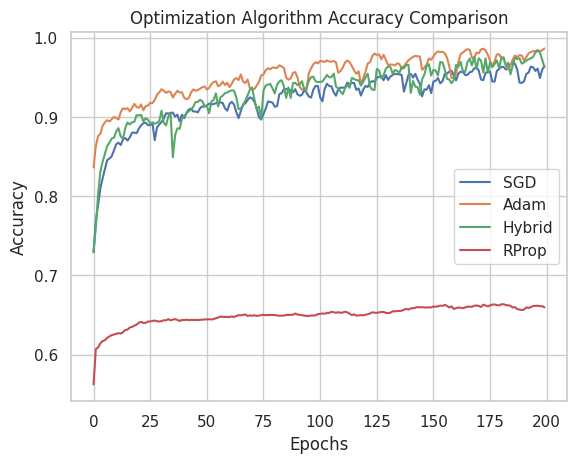

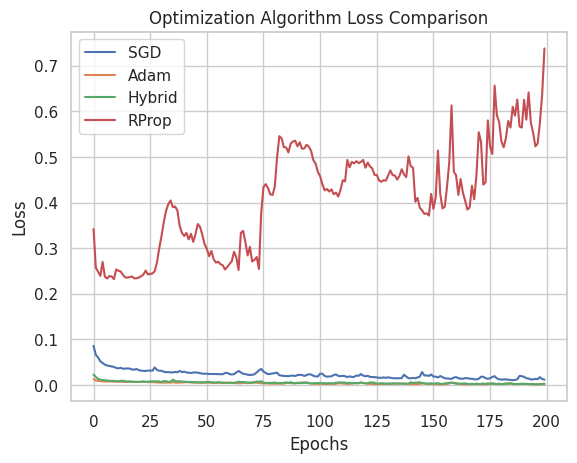

In [32]:
import ast

# create single line chart with all optimization algorithms
def retrieve_data(file_path_acc, file_path_loss):
    avg_acc_training_epochs = []
    avg_loss_training_epochs = []
    
    with open(file_path_acc, 'r') as file:
        # Read lines into a list and strip newline characters
        avg_acc_training_epochs = [line.strip() for line in file][0]
        
    with open(file_path_loss, 'r') as file:
        # Read lines into a list and strip newline characters
        avg_loss_training_epochs = [line.strip() for line in file][0]
        
    # convert string object to array
    avg_acc_training_epochs = ast.literal_eval(avg_acc_training_epochs)
    avg_loss_training_epochs = ast.literal_eval(avg_loss_training_epochs)
    
    # make sure each fold's data has the same length as the fold with the highest number of epochs
    max_epochs_acc = np.max([len(fold) for fold in avg_acc_training_epochs])
    max_epochs_loss = np.max([len(fold) for fold in avg_loss_training_epochs])
    
    # run through the folds and where a fold achieved stagnation, fill the array with the last recorded score
    for fold in avg_acc_training_epochs:
        if len(fold) < max_epochs_acc:
            for i in range(len(fold), max_epochs_acc):
                fold.append(fold[-1])
                
    for fold in avg_loss_training_epochs:
        if len(fold) < max_epochs_loss:
            for i in range(len(fold), max_epochs_loss):
                fold.append(fold[-1])
                
    avg_accs = np.zeros(max_epochs_acc)
    avg_losses = np.zeros(max_epochs_loss)
                
    # store the average over 5 folds at a specific epoch
    # -- accuracies
    for fold_data in avg_acc_training_epochs:
        for e in range(len(fold_data)):
            avg_accs[e] += fold_data[e]

    for e in range(len(avg_accs)):
        avg_accs[e] /= len(avg_acc_training_epochs)
        
    # -- losses
    for fold_data in avg_loss_training_epochs:
        for e in range(len(fold_data)):
            avg_losses[e] += fold_data[e]

    for e in range(len(avg_losses)):
        avg_losses[e] /= len(avg_loss_training_epochs)
                
    return avg_accs, avg_losses

# these file paths were obtained from a private dataset. Please update them if you have different file paths
sgd_acc_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/SGD_training_accs.txt'
sgd_loss_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/SGD_training_losses.txt'
adam_acc_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/Adam_training_accs.txt'
adam_loss_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/Adam_training_losses.txt'
rprop_acc_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/RProp_training_accs.txt'
rprop_loss_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/RProp_training_losses.txt'
hybrid_acc_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/Hybrid_training_accs.txt'
hybrid_loss_fp = '/kaggle/input/cos711-a2-epoch-accuracies-losses/Hybrid_training_losses.txt'

sgd_training_accs, sgd_training_losses = retrieve_data(sgd_acc_fp, sgd_loss_fp)
adam_training_accs, adam_training_losses = retrieve_data(adam_acc_fp, adam_loss_fp)
rprop_training_accs, rprop_training_losses = retrieve_data(rprop_acc_fp, rprop_loss_fp)
hybrid_training_accs, hybrid_training_losses = retrieve_data(hybrid_acc_fp, hybrid_loss_fp)

# plot results
def plot_all_performance(labels, all_performance_data, title, xlabel, ylabel):
    for i, data in enumerate(all_performance_data):
        plt.plot(range(len(data)), data, label=labels[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()
    
# plot accuracies - add 'RProp' data if you want to compare it with the others
plot_all_performance(['SGD', 'Adam', 'Hybrid', 'RProp'], [sgd_training_accs, adam_training_accs, hybrid_training_accs, rprop_training_accs], 'Optimization Algorithm Accuracy Comparison', 'Epochs', 'Accuracy')
plot_all_performance(['SGD', 'Adam', 'Hybrid', 'RProp'], [sgd_training_losses, adam_training_losses, hybrid_training_losses, rprop_training_losses], 'Optimization Algorithm Loss Comparison', 'Epochs', 'Loss')

In [33]:
sgd_df = pd.DataFrame([], columns=['Hidden Layers, LR', 'Mean Acc', 'Stdv Acc', 'Mean Loss', 'Stdv Loss'])
adam_df = pd.DataFrame([], columns=['Hidden Layers, LR', 'Mean Acc', 'Stdv Acc', 'Mean Loss', 'Stdv Loss'])
rprop_df = pd.DataFrame([], columns=['Hidden Layers, LR', 'Mean Acc', 'Stdv Acc', 'Mean Loss', 'Stdv Loss'])
hybrid_df = pd.DataFrame([], columns=['Hidden Layers, LR', 'Mean Acc', 'Stdv Acc', 'Mean Loss', 'Stdv Loss'])

sgd_data = []
adam_data = []
rprop_data = []
hybrid_data = []

with open('/kaggle/input/cos711-a2-means-stdvs/SGD_runs_means_stdvs.txt', 'r') as file:
    # Read lines into a list and strip newline characters
    for line in file:
        sgd_data.append(line.strip())
with open('/kaggle/input/cos711-a2-means-stdvs/Adam_runs_means_stdvs.txt', 'r') as file:
    # Read lines into a list and strip newline characters
    for line in file:
        adam_data.append(line.strip())
with open('/kaggle/input/cos711-a2-means-stdvs/RProp_runs_means_stdvs.txt', 'r') as file:
    # Read lines into a list and strip newline characters
    for line in file:
        rprop_data.append(line.strip())
with open('/kaggle/input/cos711-a2-means-stdvs/Hybrid_runs_means_stdvs.txt', 'r') as file:
    # Read lines into a list and strip newline characters
    for line in file:
        hybrid_data.append(line.strip())
        
def extract_val(string):
    colon_pos = string.find(':')
    return string[colon_pos+2:]

def extract_HL_LR(line):
    HL_str, LR_str = line.split('],')
    HL_val = extract_val(HL_str)
    LR_val = extract_val(LR_str)
    return HL_val + '], ' + LR_val

def fill_df_means_stdvs(df, data):
    current_row = -1
    current_comb = ''
    mean_acc_total = 0
    stdv_acc_total = 0
    mean_loss_total = 0
    stdv_loss_total = 0
    current_HL_LR = ''

    for line in data:
        if line.find(',') == -1:
            continue

        if line.find('Hidden Layers') != -1:
            prev_HL_LR = current_HL_LR
            current_HL_LR = extract_HL_LR(line)

            if current_row > -1:
                df.loc[current_row] = [prev_HL_LR, round(mean_acc_total / 5, 4), round(stdv_acc_total / 5, 4), round(mean_loss_total / 5, 4), round(stdv_loss_total / 5, 4)]      
                mean_acc_total = 0
                stdv_acc_total = 0
                mean_loss_total = 0
                stdv_loss_total = 0
            current_row += 1

        elif line.find('Hidden Layers') == -1 and current_row != -1:
            line_data = line.split(',')
            mean_acc_str = line_data[1]
            stdv_acc_str = line_data[2]
            mean_loss_str = line_data[3]
            stdv_loss_str = line_data[4]

            mean_acc_val = float(extract_val(mean_acc_str))
            stdv_acc_val = float(extract_val(stdv_acc_str))        
            mean_loss_val = float(extract_val(mean_loss_str))        
            stdv_loss_val = float(extract_val(stdv_loss_str))

            mean_acc_total += mean_acc_val
            stdv_acc_total += stdv_acc_val        
            mean_loss_total += mean_loss_val        
            stdv_loss_total += stdv_loss_val

    df.loc[current_row] = [current_HL_LR, round(mean_acc_total / 5, 4), round(stdv_acc_total / 5, 4), round(mean_loss_total / 5, 4), round(stdv_loss_total / 5, 4)]      
        
fill_df_means_stdvs(sgd_df, sgd_data)
fill_df_means_stdvs(adam_df, adam_data)
fill_df_means_stdvs(rprop_df, rprop_data)
fill_df_means_stdvs(hybrid_df, hybrid_data)

In [34]:
sgd_df

,"Hidden Layers, LR",Mean Acc,Stdv Acc,Mean Loss,Stdv Loss
0,"[64, 32], 0.001",0.6009,0.0240,0.8403,0.0359
1,"[64, 32], 0.01",0.7130,0.0268,0.6703,0.0393
2,"[64, 32], 0.015",0.7302,0.0340,0.6845,0.0576
3,"[128, 64, 32], 0.001",0.6357,0.0184,0.7804,0.0318
4,"[128, 64, 32], 0.01",0.7597,0.0493,0.7681,0.1238
5,"[128, 64, 32], 0.015",0.7871,0.0627,0.7359,0.2096
6,"[256, 128, 64, 32], 0.001",0.6769,0.0308,0.7123,0.0533
7,"[256, 128, 64, 32], 0.01",0.8137,0.0877,0.6867,0.3236
8,"[256, 128, 64, 32], 0.015",0.8216,0.1003,0.7300,0.4604


In [35]:
adam_df

,"Hidden Layers, LR",Mean Acc,Stdv Acc,Mean Loss,Stdv Loss
0,"[64, 32], 0.001",0.7437,0.0331,0.6106,0.0784
1,"[64, 32], 0.001",0.7404,0.0304,0.8444,0.1072
2,"[64, 32], 0.015",0.7037,0.0225,0.8077,0.0720
3,"[128, 64, 32], 0.001",0.8216,0.0551,0.6413,0.1760
4,"[128, 64, 32], .01",0.7632,0.0397,0.9207,0.1737
5,"[128, 64, 32], 0.015",0.7180,0.0373,0.8612,0.1448
6,"[256, 128, 64, 32], 0.001",0.8529,0.0663,0.6241,0.3662
7,"[256, 128, 64, 32], 0.01",0.7672,0.0511,0.9622,0.1927
8,"[256, 128, 64, 32], 0.015",0.7132,0.0312,0.8402,0.0902


In [36]:
rprop_df

,"Hidden Layers, LR",Mean Acc,Stdv Acc,Mean Loss,Stdv Loss
0,"[64, 32], 0.001",0.5577,0.0216,0.9930,0.1021
1,"[64, 32], 0.01",0.5523,0.0127,0.9229,0.0295
2,"[64, 32], 0.015",0.5527,0.0235,0.9215,0.0343
3,"[128, 64, 32], 0.001",0.5844,0.0139,2.6302,1.2516
4,"[128, 64, 32], 0.01",0.5809,0.0179,1.0007,0.1449
5,"[128, 64, 32], 0.015",0.5832,0.0161,0.9282,0.0929
6,"[256, 128, 64, 32], 0.001",0.6195,0.0185,64.9347,85.1919
7,"[256, 128, 64, 32], 0.01",0.5995,0.0180,2.3685,2.2109
8,"[256, 128, 64, 32], 0.015",0.5927,0.0237,172.0483,333.9557


In [37]:
hybrid_df

,"Hidden Layers, LR",Mean Acc,Stdv Acc,Mean Loss,Stdv Loss
0,"[64, 32], 0.001",0.6529,0.0308,0.7589,0.0369
1,"[64, 32], 0.01",0.7335,0.0407,0.7629,0.0752
2,"[64, 32], 0.015",0.7257,0.0494,0.8798,0.1926
3,"[128, 64, 32], 0.001",0.6929,0.0310,0.6852,0.0476
4,"[128, 64, 32], 0.01",0.7947,0.0683,0.7719,0.2413
5,"[128, 64, 32], 0.015",0.8138,0.0760,0.7096,0.3109
6,"[256, 128, 64, 32], 0.001",0.7224,0.0532,0.6678,0.0788
7,"[256, 128, 64, 32], 0.01",0.8473,0.0969,0.5907,0.4007
8,"[256, 128, 64, 32], 0.015",0.8511,0.0946,0.6062,0.4210


In [38]:
mean_acc_comparison_df = pd.DataFrame(columns=['Hidden Layers, LR', 'SGD', 'Adam', 'RProp', 'Hybrid'])
stdv_acc_comparison_df = pd.DataFrame(columns=['Hidden Layers, LR', 'SGD', 'Adam', 'RProp', 'Hybrid'])
mean_loss_comparison_df = pd.DataFrame(columns=['Hidden Layers, LR', 'SGD', 'Adam', 'RProp', 'Hybrid'])
stdv_loss_comparison_df = pd.DataFrame(columns=['Hidden Layers, LR', 'SGD', 'Adam', 'RProp', 'Hybrid'])

def fill_comparison_df(empty_df, sgd_df, adam_df, rprop_df, hybrid_df, label):
    empty_df['Hidden Layers, LR'] = sgd_df['Hidden Layers, LR']
    empty_df['SGD'] = sgd_df[label]
    empty_df['Adam'] = adam_df[label]
    empty_df['RProp'] = rprop_df[label]
    empty_df['Hybrid'] = hybrid_df[label]
    
fill_comparison_df(mean_acc_comparison_df, sgd_df, adam_df, rprop_df, hybrid_df, 'Mean Acc')
fill_comparison_df(stdv_acc_comparison_df, sgd_df, adam_df, rprop_df, hybrid_df, 'Stdv Acc')
fill_comparison_df(mean_loss_comparison_df, sgd_df, adam_df, rprop_df, hybrid_df, 'Mean Loss')
fill_comparison_df(stdv_loss_comparison_df, sgd_df, adam_df, rprop_df, hybrid_df, 'Stdv Loss')

In [39]:
mean_acc_comparison_df

,"Hidden Layers, LR",SGD,Adam,RProp,Hybrid
0,"[64, 32], 0.001",0.6009,0.7437,0.5577,0.6529
1,"[64, 32], 0.01",0.7130,0.7404,0.5523,0.7335
2,"[64, 32], 0.015",0.7302,0.7037,0.5527,0.7257
3,"[128, 64, 32], 0.001",0.6357,0.8216,0.5844,0.6929
4,"[128, 64, 32], 0.01",0.7597,0.7632,0.5809,0.7947
5,"[128, 64, 32], 0.015",0.7871,0.7180,0.5832,0.8138
6,"[256, 128, 64, 32], 0.001",0.6769,0.8529,0.6195,0.7224
7,"[256, 128, 64, 32], 0.01",0.8137,0.7672,0.5995,0.8473
8,"[256, 128, 64, 32], 0.015",0.8216,0.7132,0.5927,0.8511


In [40]:
stdv_acc_comparison_df

,"Hidden Layers, LR",SGD,Adam,RProp,Hybrid
0,"[64, 32], 0.001",0.0240,0.0331,0.0216,0.0308
1,"[64, 32], 0.01",0.0268,0.0304,0.0127,0.0407
2,"[64, 32], 0.015",0.0340,0.0225,0.0235,0.0494
3,"[128, 64, 32], 0.001",0.0184,0.0551,0.0139,0.0310
4,"[128, 64, 32], 0.01",0.0493,0.0397,0.0179,0.0683
5,"[128, 64, 32], 0.015",0.0627,0.0373,0.0161,0.0760
6,"[256, 128, 64, 32], 0.001",0.0308,0.0663,0.0185,0.0532
7,"[256, 128, 64, 32], 0.01",0.0877,0.0511,0.0180,0.0969
8,"[256, 128, 64, 32], 0.015",0.1003,0.0312,0.0237,0.0946


In [41]:
mean_loss_comparison_df

,"Hidden Layers, LR",SGD,Adam,RProp,Hybrid
0,"[64, 32], 0.001",0.8403,0.6106,0.9930,0.7589
1,"[64, 32], 0.01",0.6703,0.8444,0.9229,0.7629
2,"[64, 32], 0.015",0.6845,0.8077,0.9215,0.8798
3,"[128, 64, 32], 0.001",0.7804,0.6413,2.6302,0.6852
4,"[128, 64, 32], 0.01",0.7681,0.9207,1.0007,0.7719
5,"[128, 64, 32], 0.015",0.7359,0.8612,0.9282,0.7096
6,"[256, 128, 64, 32], 0.001",0.7123,0.6241,64.9347,0.6678
7,"[256, 128, 64, 32], 0.01",0.6867,0.9622,2.3685,0.5907
8,"[256, 128, 64, 32], 0.015",0.7300,0.8402,172.0483,0.6062


In [42]:
stdv_loss_comparison_df

,"Hidden Layers, LR",SGD,Adam,RProp,Hybrid
0,"[64, 32], 0.001",0.0359,0.0784,0.1021,0.0369
1,"[64, 32], 0.01",0.0393,0.1072,0.0295,0.0752
2,"[64, 32], 0.015",0.0576,0.0720,0.0343,0.1926
3,"[128, 64, 32], 0.001",0.0318,0.1760,1.2516,0.0476
4,"[128, 64, 32], 0.01",0.1238,0.1737,0.1449,0.2413
5,"[128, 64, 32], 0.015",0.2096,0.1448,0.0929,0.3109
6,"[256, 128, 64, 32], 0.001",0.0533,0.3662,85.1919,0.0788
7,"[256, 128, 64, 32], 0.01",0.3236,0.1927,2.2109,0.4007
8,"[256, 128, 64, 32], 0.015",0.4604,0.0902,333.9557,0.4210
